In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# 🧩 Step 2: Load Data
features = pd.read_csv("data1.csv")
labels = pd.read_csv("data_label.csv")

# For demonstration: Generate dummy labels (replace with actual ones)
# Let's assume we have N rows and K labels from data_label.csv
label_list = labels['EN'].tolist()
y_dummy = np.tile(label_list, int(np.ceil(len(features) / len(label_list))))[:len(features)]# Skip _BLANK_
print(y_dummy)

['_BLANK_' 'Bye' 'Good' ... 'To meet you' 'Try being' 'What are you doing']
Good


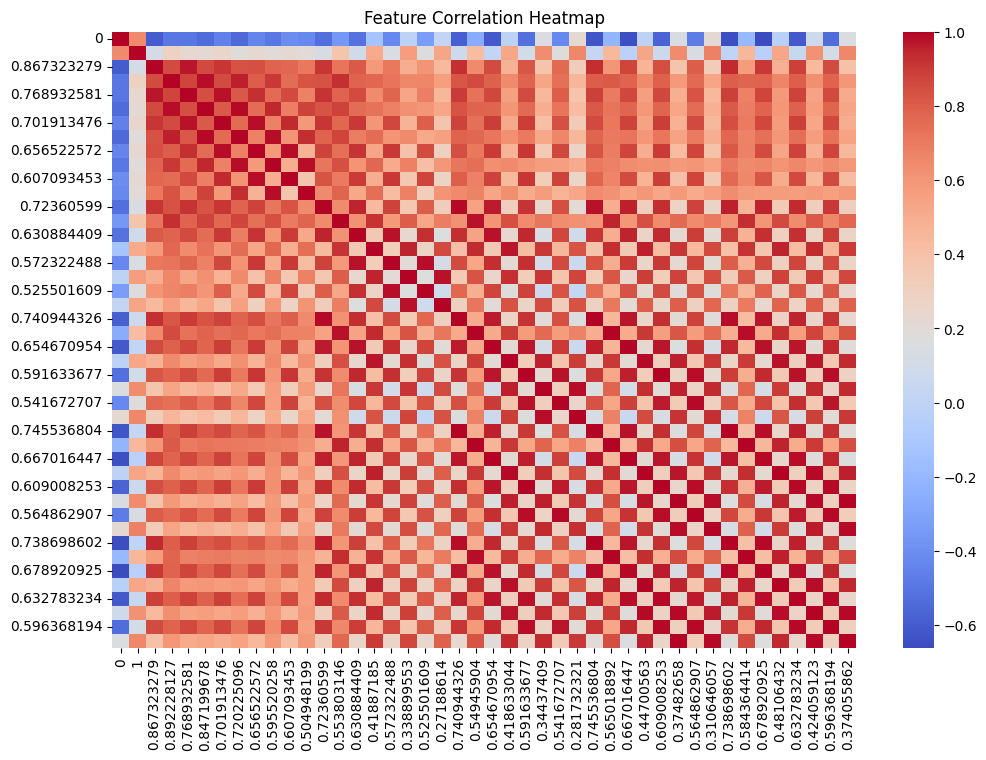

In [38]:
# 🧩 Step 3: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

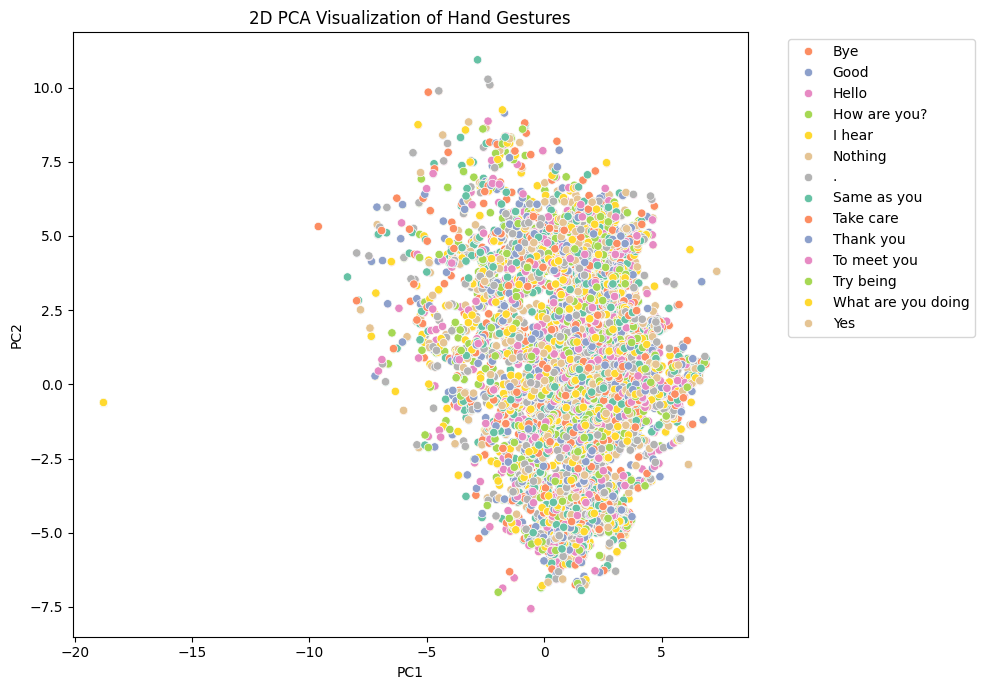

In [39]:
# 🧩 Step 5: PCA for 2D Visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_dummy, palette='Set2')
plt.title("2D PCA Visualization of Hand Gestures")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
# 🧩 Step 6: Train-Test Split and Model Training (for confusion matrix)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_dummy, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
# 🧩 Step 7: Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

                    precision    recall  f1-score   support

                 .       0.10      0.09      0.10       503
               Bye       0.02      0.02      0.02       237
              Good       0.02      0.02      0.02       266
             Hello       0.01      0.01      0.01       251
      How are you?       0.01      0.01      0.01       238
            I hear       0.02      0.02      0.02       217
           Nothing       0.03      0.02      0.03       248
       Same as you       0.01      0.01      0.01       230
         Take care       0.02      0.02      0.02       255
         Thank you       0.03      0.03      0.03       234
       To meet you       0.01      0.01      0.01       225
         Try being       0.03      0.02      0.03       243
What are you doing       0.02      0.02      0.02       239
               Yes       0.01      0.01      0.01       228
           _BLANK_       0.02      0.02      0.02       226

          accu

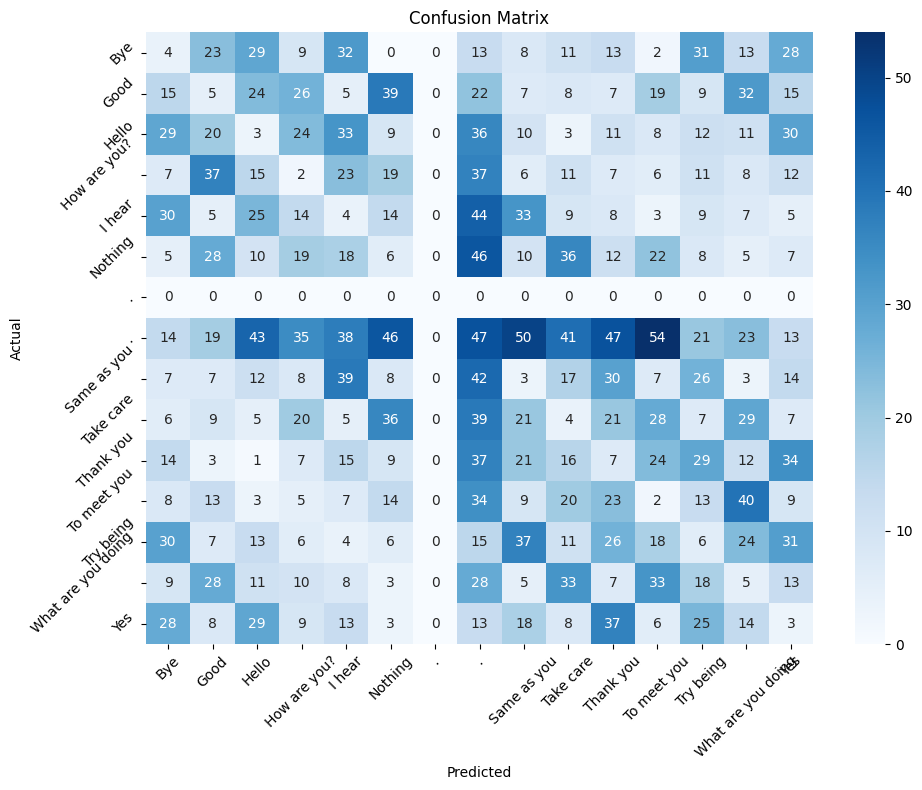

In [44]:
# 🧩 Step 8: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=label_list[1:])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_list[1:], yticklabels=label_list[1:], cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Accuracy: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      0.99      0.99       240
           2       0.99      0.99      0.99       240
           3       1.00      1.00      1.00       240
           4       0.98      0.99      0.99       240
           5       0.99      0.98      0.98       240
           6       0.99      0.99      0.99       240
           7       0.98      0.97      0.98       240
           8       0.99      0.99      0.99       240
           9       0.98      1.00      0.99       240
          10       0.99      0.98      0.99       240
          11       1.00      0.99      0.99       240
          12       0.98      0.98      0.98       240
          13       0.97      0.98      0.97       240
          14       0.98      0.98      0.98       240
          15       1.00      1.00      1.00       240

    accuracy                          

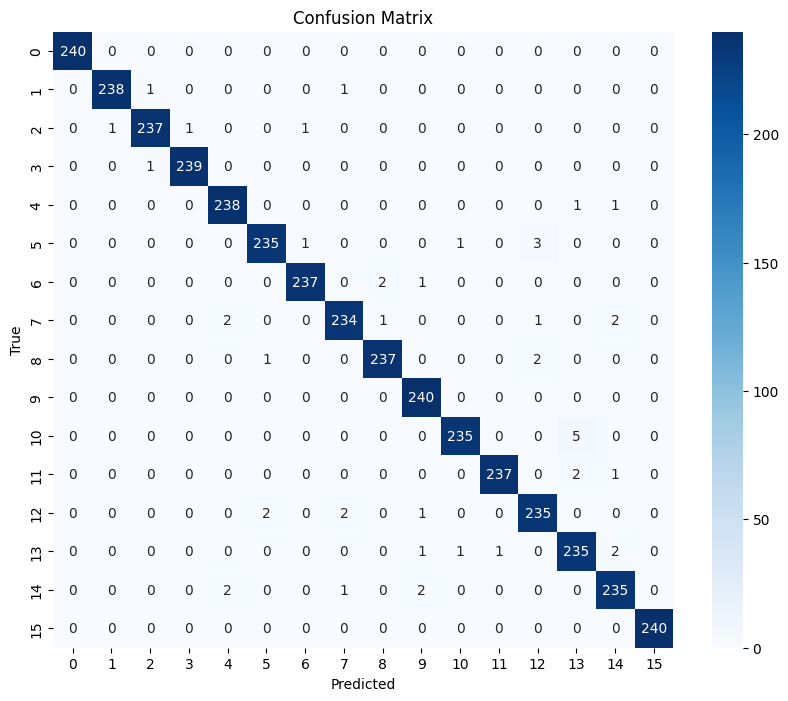

In [27]:
# Step 0: Install required packages if needed
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and preprocess
df = pd.read_csv("data1.csv", header=None)
df_clean = df.drop(columns=[0])
X = df_clean.iloc[:, 1:].values  # 42 features
y = df_clean.iloc[:, 0].values   # labels (0–15)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Train
clf = RandomForestClassifier(n_estimators=1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 3: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Accuracy: 0.9994791666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       240
           5       1.00      0.99      1.00       240
           6       1.00      1.00      1.00       240
           7       1.00      1.00      1.00       240
           8       1.00      1.00      1.00       240
           9       1.00      1.00      1.00       240
          10       1.00      1.00      1.00       240
          11       1.00      1.00      1.00       240
          12       0.99      1.00      1.00       240
          13       1.00      1.00      1.00       240
          14       1.00      1.00      1.00       240
          15       1.00      1.00      1.00       240

    accuracy              

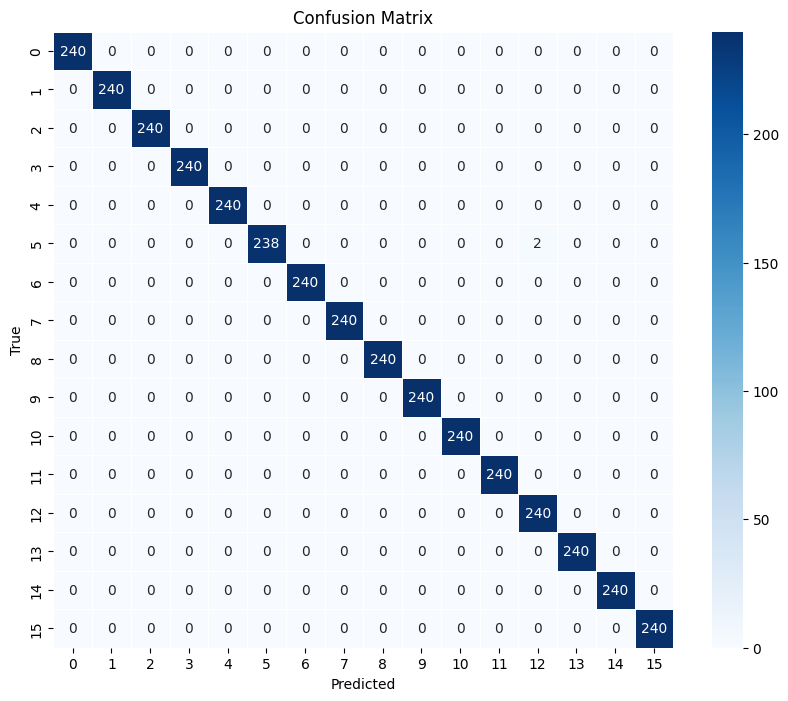

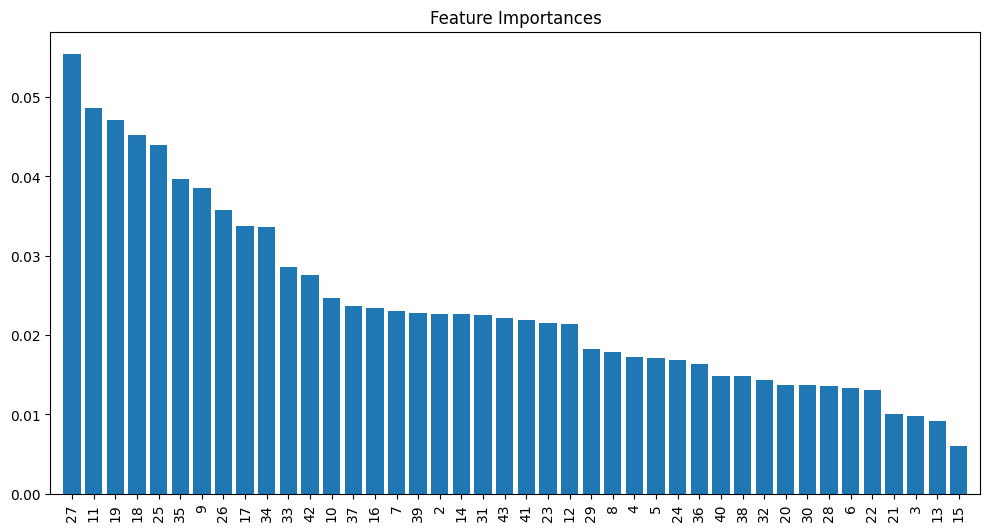

ValueError: Found input variables with inconsistent numbers of samples: [19200, 3840]

<Figure size 800x600 with 0 Axes>

In [29]:
# Step 0: Install required packages if needed
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# Step 1: Load and preprocess the dataset
df = pd.read_csv("data1.csv", header=None)
df_clean = df.drop(columns=[0])
X = df_clean.iloc[:, 1:].values  # 42 features
y = df_clean.iloc[:, 0].values   # labels (0–15)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Train the RandomForest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 4: Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Feature Importance
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), df_clean.columns[1:].values[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# ROC Curve for Multi-Class Classification (One-vs-Rest Approach)
y_bin = label_binarize(y, classes=np.unique(y))
y_pred_proba = clf.predict_proba(X_test)

plt.figure(figsize=(8, 6))

# Loop through each class and calculate the ROC curve
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curve for Multi-Class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_bin.ravel(), y_pred_proba.ravel())

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()
